# Part 1: Training and evaluating simple CNNs

__Before starting, we recommend you enable GPU acceleration if you're running on Colab.__

In [1]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

## Simple Convolutional Neural Network for MNIST

Now that we have seen how to load the MNIST dataset and train a simple multi-layer perceptron model on it, we can now start to develop a more sophisticated convolutional neural network or CNN model. PyTorch provides a lot of capability for creating CNNs, and includes a large number of layer types and activation functions. In this part of the lab we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

The first step is to import the classes and functions needed.

In [47]:
# automatically reload external modules if they change
%load_ext autoreload
%autoreload 2

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchbearer
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchbearer import Trial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Again, initialise the random number generator to a constant seed value for reproducibility of results.

In [4]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Next we need to load the MNIST dataset. Unlike with the MLP example we looked at previously, we don't want to flatten the images into vectors, although we do still want to convert the PIL images to tensors.

In PyTorch, images are represented as tensors with dimensions `[pixels][height][width]`. In the case of RGB, the first dimension, pixels, would be 3 for the red, green and blue components. In the case of MNIST where the pixel values are greyscale, the pixel dimension is set to 1.

In [19]:
# convert each image to tensor format
transform = transforms.Compose([
    transforms.ToTensor()  # convert to tensor
])

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

In [20]:
print(trainset.data.size())

torch.Size([60000, 28, 28])


Next we define our neural network model.

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements required for near state of the art results. The network architecture is summarised below:

1. The first hidden layer is a convolutional layer called a `Convolution2D`. The layer has 32 feature maps, which with the size of 5×5 and a rectified linear unit activation function.
2. Next we define a pooling layer that takes the max called `MaxPooling2D`. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called `Dropout`. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is an operation that flattens or reshapes the tensor to a vector. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier linear unit activation function.
6. Finally, the output layer has 10 neurons for the 10 classes.

Just like with the MLP we create a PyTorch `nn.Module` subclass to define our network model:

In [66]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
        self.fc1 = nn.Linear(32 * 12**2, 128)
        self.fc2 = nn.Linear(128, 10)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [43]:
class SimpleCNN1(nn.Module):
    def __init__(self):
        super(SimpleCNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
            
    def forward(self, x):
        out = self.conv1(x)
        return out
    
class SimpleCNN2(nn.Module):
    def __init__(self):
        super(SimpleCNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (7, 3), padding=0)
            
    def forward(self, x):
        out = self.conv1(x)
        return out
    
class SimpleCNN3(nn.Module):
    def __init__(self):
        super(SimpleCNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        return out
    
class SimpleCNN4(nn.Module):
    def __init__(self):
        super(SimpleCNN4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)

    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        return out

class SimpleCNN5(nn.Module):
    def __init__(self):
        super(SimpleCNN5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        return out
    
class SimpleCNN6(nn.Module):
    def __init__(self):
        super(SimpleCNN6, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        return out
    
class SimpleCNN7(nn.Module):
    def __init__(self):
        super(SimpleCNN7, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
        self.fc1 = nn.Linear(32 * 12**2, 128)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        return out

class SimpleCNN8(nn.Module):
    def __init__(self):
        super(SimpleCNN8, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (5, 5), padding=0)
        self.fc1 = nn.Linear(32 * 12**2, 128)
        self.fc2 = nn.Linear(128, 10)
            
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [44]:
model1 = SimpleCNN1()
x = torch.randn(1,1,28,28)
output = model1(x)
print(output.size())

model2 = SimpleCNN2()
x = torch.randn(2,1,28,28)
output = model2(x)
print(output.size())

model3 = SimpleCNN3() #conv1
x = torch.randn(3,1,28,28)
output = model3(x)
print(output.size())

model4 = SimpleCNN4() #max_pool(2,2)
x = torch.randn(4,1,28,28)
output = model4(x)
print(output.size())

model5 = SimpleCNN5() #dropout,0.2
x = torch.randn(5,1,28,28)
output = model5(x)
print(output.size())

model6 = SimpleCNN6() #view(-1)
x = torch.randn(6,1,28,28)
output = model6(x)
print(output.size())

model7 = SimpleCNN7() #f1:Linear(x to 128)
x = torch.randn(7,1,28,28)
output = model7(x)
print(output.size())

model8 = SimpleCNN8() #f2:Linear(x to 10)
x = torch.randn(8,1,28,28)
output = model8(x)
print(output.size())

torch.Size([1, 32, 24, 24])
torch.Size([2, 32, 22, 26])
torch.Size([3, 32, 24, 24])
torch.Size([4, 32, 12, 12])
torch.Size([5, 32, 12, 12])
torch.Size([6, 4608])
torch.Size([7, 128])
torch.Size([8, 10])


Note in the above code when we use the `view` method to _flatten_ the tensor we must preserve the batch dimension of the data; passing `-1` as the second argument tells view to compute the size of the dimension represented by the `-1` automatically. The input to the forward method has shape `[batch_size][pixels][height][width]` and we want the final output to be `[batch_size][num_classes=10]`. 

__Answer the following questions (enter the answer in the box below each one):__

__1.__ What is the shape of the tensor output by the `conv1` layer?

Output = (W-K+2P)/S + 1 = (28-5+0)/1+1 = 24

__2.__ If the `conv1` layer had a kernel shape of `(7,3)` what would the output shape be?

Output [height] = (W - K [height]+2P)/S + 1 = (28-3+0)/1+1 = 26

Output [width] = (W - K [width]+2P)/S + 1 = (28-7+0)/1+1 = 22

As before, the model is trained using cross-entropy loss and the ADAM gradient descent algorithm. The CNN is fit over 10 epochs with a batch size of 128. We use torchbearer to minimise the training and evaluation code we need to write:

In [67]:
# build the model
model = SimpleCNN()

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/79 [00:00<?, ?it/s]

{'test_loss': 0.04495362937450409, 'test_acc': 0.9871999621391296}


You should see that the network achieves an accuracy of 98.91% which is better than the simple multi-layer perceptron model we tried previously.

## An improved CNN

Now that we have seen how to create a simple CNN, let’s take a look at a model capable of close to state of the art results. This time you will implement a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology of the model is summarised as follows:

1. Convolutional layer with 30 feature maps of size 5×5 and ReLU activation.
2. Pooling layer taking the max over 2×2 patches.
3. Convolutional layer with 15 feature maps of size 3×3 and ReLU activation.
4. Pooling layer taking the max over 2×2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and ReLU activation.
8. Fully connected layer with 50 neurons and ReLU activation.
9. Linear output layer.

__Complete the implementation of the BetterCNN module which implements the above network in the following code block.__

In [69]:
import torch 
import torch.nn.functional as F
from torch import nn

# Model Definition
class BetterCNN(nn.Module):
    def __init__(self):
        super(BetterCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, (5, 5), padding=0)
        self.conv2 = nn.Conv2d(30, 15, (3, 3), padding=0)
        self.fc1 = nn.Linear(15 * 5**2, 128)
        self.fc2 = nn.Linear(128, 50)
        self.fc3 = nn.Linear(50, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out
        # YOUR CODE HERE
        
        raise NotImplementedError()

Once you've completed the implementation, save the file and run the following code block to train and evaluate the model.

In [70]:
#reset the data loaders
torch.manual_seed(seed)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

# build the model
model = BetterCNN()

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

assert results['test_acc'] > 0.99


0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/79 [00:00<?, ?it/s]

{'test_loss': 0.030909711495041847, 'test_acc': 0.9898999929428101}


AssertionError: 

If correctly implemented you should see this slightly larger model achieves the respectable classification accuracy of 99.13%.

## Saving models

Being able to train a model is fine, but in practice once we've trained the model we probably want to save the result so we can reuse it at a later time. PyTorch makes saving the model easy using the `torch.save(state, filepath)` function. This will save the weights of the model so they can be loaded into a new instance at a later point. 

__Run the following code to save the weights for use in the next part of the lab.__

In [54]:
#save the trained model weights
torch.save(model.state_dict(), "./bettercnn.weights")

__If you are running on Colab, run the following to download the weights to the local machine:__

In [55]:
from google.colab import files
files.download('bettercnn.weights')

ModuleNotFoundError: No module named 'google'

# Part 2: Loading a saved model

__Before starting, we recommend you enable GPU acceleration if you're running on Colab. You'll also need to upload the weights you downloaded previously using the following block and using the upload button to upload your bettercnn.weights file:__

In [78]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision
    
try: 
    import torchbearer
except:
    !pip install torchbearer

try:
    from google.colab import files
    uploaded = files.upload()
except:
    print("Not running on colab. Ignoring.")
    
try: 
    import wget
except:
    !pip install wget

wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/0.PNG') 
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/1.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/2.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/3.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/4.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/5.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/6.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/7.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/8.PNG')
wget.download('http://comp6248.ecs.soton.ac.uk/labs/lab5/9.PNG')

Not running on colab. Ignoring.
100% [..................................................................................] 261 / 261

'9.PNG'

## Reading models and propagating input

At this point, we know how to train a model and how to save the resultant weights. Let's assume we're in the business of building a real system for handwritten character recognition; we need to be able to read in a previously trained model and forward propagate an image from outside the MNIST dataset through it in order to generate a prediction. Let's build some code to do just that. Firstly we need to load the model we saved in the previous part of the lab; PyTorch doesn't save the model structure by default, so you'll need to copy-paste the `BetterCNN` `forward` method implementation from the previous workbook into the block below:

In [81]:
%matplotlib inline
# automatically reload external modules if they change
%load_ext autoreload
%autoreload 2

import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn

import torch 
import torch.nn.functional as F
from torch import nn

# Model Definition
class BetterCNN(nn.Module):
    
    def __init__(self):
        super(BetterCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, (5, 5), padding=0)
        self.conv2 = nn.Conv2d(30, 15, (3, 3), padding=0)
        self.fc1 = nn.Linear(15 * 5**2, 128)
        self.fc2 = nn.Linear(128, 50)
        self.fc3 = nn.Linear(50, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out
        raise NotImplementedError()

# build the model and load state
model = BetterCNN()
model.load_state_dict(torch.load('bettercnn.weights'))

# put model in eval mode
model = model.eval() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We've provided a set of images you can try. Let's load the one corresponding to a '1', convert it to a tensor, and display it:

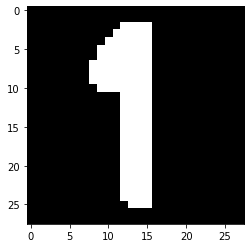

In [82]:
from PIL import Image
import torchvision

transform = torchvision.transforms.ToTensor()
im = transform(Image.open("1.PNG"))

plt.imshow(im[0], cmap=plt.get_cmap('gray'))

Now we'll use the model to make a prediction. The model expects input to have a batch dimension, so we use `unsqueeze(0)` to prepend one to the image. Recall that the model outputs the logits of the classes; the index of the biggest one will tell us which class has been predicted.

In [84]:
batch = im.unsqueeze(0)
predictions = model(batch)

print("logits:", predictions.data)

_, predicted_class = predictions.max(1)

print("predicted class:", predicted_class.item())

logits: tensor([[-4.1561,  8.2611, -3.5657, -5.4341, -1.4724, -3.8578, -3.0020,  0.0109,
          2.2517, -2.3591]])
tensor([1])
predicted class: 1


We've provided images `0.PNG` through to `9.PNG` for you to play with. Use the following code block to classify each image and print the results.

predicted class 0: 0
predicted class 1: 1
predicted class 2: 2
predicted class 3: 3
predicted class 4: 4
predicted class 5: 5
predicted class 6: 6
predicted class 7: 7
predicted class 8: 8
predicted class 9: 9


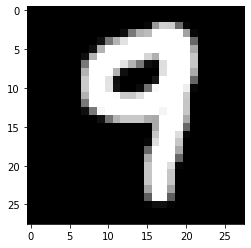

In [90]:
for i in range(10):
    transform = torchvision.transforms.ToTensor()
    a = str("%d.PNG"%i) 
    im = transform(Image.open("%d.PNG"%i))
    plt.imshow(im[0], cmap=plt.get_cmap('gray'))
    batch = im.unsqueeze(0)
    predictions = model(batch)
    _, predicted_class = predictions.max(1)
    print("predicted class %d:"%i, predicted_class.item())

__Answer the following question (enter the answer in the box below each one):__

__1.__ How many images were missclassified? Which images?

# Part 3: Visualising Convolutional Networks

## Visualising the first layers filters and responses

In our previous `BetterCNN` convolutional network, the first layer was a Convolutional layer. Because this convolutional layer is applied directly to the greylevel input MNIST images the filters that are learned can themselves just be considered to be small (5x5 in this case) greylevel images. 

We'll start by doing a few imports and then loading our pre-trained model. Once again, please copy-paste the forward method from the first workbook:

In [115]:
%matplotlib inline
# automatically reload external modules if they change
%load_ext autoreload
%autoreload 2

import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn

import torch 
import torch.nn.functional as F
from torch import nn

# Model Definition
class BetterCNN(nn.Module):
    def __init__(self):
        super(BetterCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, (5, 5), padding=0)
        self.conv2 = nn.Conv2d(30, 15, (3, 3), padding=0)
        self.fc1 = nn.Linear(15 * 5**2, 128)
        self.fc2 = nn.Linear(128, 50)
        self.fc3 = nn.Linear(50, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out
        raise NotImplementedError()

# build the model and load state
model = BetterCNN()
model.load_state_dict(torch.load('bettercnn.weights'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<All keys matched successfully>

We can extract the weights of the first layer filters directly from the trained network and visualise them using `matplotlib` like this:

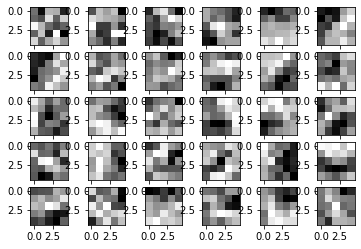

In [116]:
from matplotlib.pyplot import imread

weights = model.conv1.weight.data.cpu()

# plot the first layer features
for i in range(0,30):
	plt.subplot(5,6,i+1)
	plt.imshow(weights[i, 0, :, :], cmap=plt.get_cmap('gray'))
plt.show()

Note that `model.conv1.data` is the tensor holding the weights. Calling `cpu()` ensures data is moved over from the GPU if necessary.

__Answer the following question (enter the answer in the box below):__

__1.__ What sort of features do the filters resemble? How does this relate to your knowledge of the training data?

## Visualising feature maps

If we forward propagate an input through the network we can also visualise the response maps generated by the filters. The advantage of this kind of visualisation is that we can compute it at any layer, not just the first one. In order to do this in PyTorch, we can propagate the given input through the network to the required point and use a `hook` to intercept the feature maps as they are created. The following code shows how this can be achieved to generate the response maps of the second convolutional layer of our network:

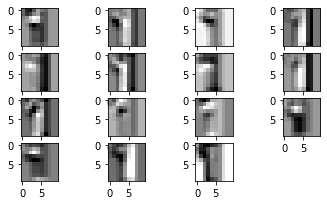

In [117]:
from PIL import Image
import torchvision

transform = torchvision.transforms.ToTensor()
im = transform(Image.open("1.PNG")).unsqueeze(0)

def hook_function(module, grad_in, grad_out):
    for i in range(grad_out.shape[1]):
        conv_output = grad_out.data[0, i]
        plt.subplot(5, int(1+grad_out.shape[1]/5), i+1)
        plt.imshow(conv_output, cmap=plt.get_cmap('gray'))
        
hook = model.conv2.register_forward_hook(hook_function) # register the hook
model(im) # forward pass
hook.remove() #Tidy up

Use the following code block to visualise the feature maps of the first convolutional layer:

A final way of visualising what the filters (at any depth) are learning is to find the input image that maximises the response of the filter. We can do this by starting with a random image and using gradient ascent to optimise the image to maximise the chosen filter (see http://www.iro.umontreal.ca/~lisa/publications2/index.php/publications/show/247 and https://distill.pub/2017/feature-visualization/ for more info on this approach). The following code snippet shows how this can be achieved:

<ipython-input-119-d7a2cd0ac68e>:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,num/2,selected+1)


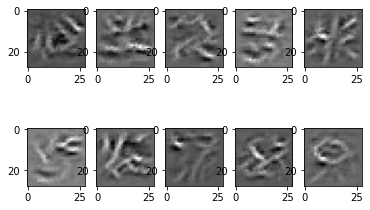

In [119]:
def visualise_maximum_activation(model, target, num=10, alpha = 1.0):
    for selected in range(num):
        input_img = torch.randn(1, 1, 28, 28, requires_grad=True)

        # we're interested in maximising outputs of the 3rd layer:
        conv_output = None

        def hook_function(module, grad_in, grad_out):
            nonlocal conv_output
            # Gets the conv output of the selected filter/feature (from selected layer)
            conv_output = grad_out[0, selected]

        hook = target.register_forward_hook(hook_function)

        for i in range(30):
            model(input_img)
            loss = torch.mean(conv_output)
            loss.backward()

            norm = input_img.grad.std() + 1e-5
            input_img.grad /= norm
            input_img.data = input_img + alpha * input_img.grad

        hook.remove()

        input_img = input_img.detach()

        plt.subplot(2,num/2,selected+1)
        plt.imshow(input_img[0,0], cmap=plt.get_cmap('gray'))

    plt.show()
    
visualise_maximum_activation(model, model.fc3)

# Part 4: More advanced networks

Recent network models, such as the deep residual network (ResNet) and GoogLeNet architectures, do not follow a straight path from input to output. Instead, these models incorporate branches and merges to create a computation graph. Branching and merging is easy to implement in PyTorch as shown in the following code snippet:

In [121]:
import torch 
import torch.nn.functional as F
from torch import nn

class BranchModel(nn.Module):
    def __init__(self):
        super(BranchModel, self).__init__()
        self.left  = nn.Conv2d(1, 16, (1, 1), padding=0)
        self.right = nn.Conv2d(1, 16, (5, 5), padding=2)
        self.fc1 = nn.Linear(16*14*14, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        out_l = self.left(x)
        out_l = F.relu(out_l)
        print(out_l.size())

        out_r = self.right(x)
        out_r = F.relu(out_r)
        print(out_r.size())

        out = out_l + out_r
        print(out.size())
        
        out = F.max_pool2d(out, (2,2))
        print(out.size())
        out = F.dropout(out, 0.2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)

        return out

In [126]:
model = BranchModel()
# x = torch.randn(1,1,28,28)
# out = model(x)
# print(out.size())

This defines a variant of our initial simple CNN model in which the input is split into two paths and then merged again; the left hand path consists of a 1x1 convolution layer, whilst the right-hand path has a 5x5 convolutional layer. The 1x1 convolutions will have the effect of increasing the number of bands in the input from 1 to 16 (with each band a (potentially different) scalar multiple of the input). Padding is used to ensure the feature maps have the same shape on the left and right branches. In this case the left and right branches are merged by summing them together (element-wise, layer by layer).

__Use the code block below to train and evaluate the above model.__

torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 0: 1
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 1: 0
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 2: 1
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 3: 6
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 4: 0
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 5: 1
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
predicted class 6: 1
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 28, 28])
torch.Size([1

NotImplementedError: 

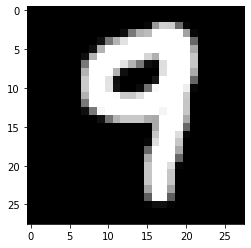

In [129]:
for i in range(10):
    transform = torchvision.transforms.ToTensor()
    a = str("%d.PNG"%i) 
    im = transform(Image.open("%d.PNG"%i))
    plt.imshow(im[0], cmap=plt.get_cmap('gray'))
    batch = im.unsqueeze(0)
    predictions = model(batch)
    _, predicted_class = predictions.max(1)
    print("predicted class %d:"%i, predicted_class.item())
raise NotImplementedError()

## Going further

None of the network topology we have experimented with thus far are optimised. Nor are they reproductions of network topologies from recent papers.

__There is a lot of opportunity for you to tune and improve upon these models. What is the best error rate score you can achieve?__

In [11]:
import torch
img = torch.zeros(40,40)
dx = torch.randint(-10,10,(1,),dtype=torch.float)
dy = torch.randint(-10,10,(1,),dtype=torch.float)
c = torch.randint(-20,20,(1,), dtype=torch.float)
print(img,dx,dy,c)
params = torch.cat((dy/dx, c))
xy = torch.randint(0,img.shape[1], (20, 2), dtype=torch.float)
print(params)
print(xy)
xy[:,1] = xy[:,0] * params[0] + params[1]
print(xy)
xy.round_()
print(xy)
xy = xy[ xy[:,1] > 0 ]
print(xy)
xy = xy[ xy[:,1] < 40 ]
print(xy)
xy = xy[ xy[:,0] < 40 ]
print(xy)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([-8.]) tensor([-6.]) tensor([-3.])
tensor([ 0.7500, -3.0000])
tensor([[16., 29.],
        [30.,  8.],
        [18., 37.],
        [14.,  1.],
        [24.,  8.],
        [20.,  8.],
        [ 0., 38.],
        [37., 26.],
        [ 7.,  0.],
        [32.,  7.],
        [23., 23.],
        [10., 13.],
        [15.,  7.],
        [13.,  3.],
        [15., 39.],
        [37., 29.],
        [ 6., 28.],
        [37.,  4.],
        [ 8., 26.],
        [14.,  1.]])
tensor([[16.0000,  9.0000],
        [30.0000, 19.5000],
        [18.0000, 10.5000],
        [14.0000,  7.5000],
        [24.0000, 15.0000],
        [20.0000, 12.0000],
        [ 0.0000, -3.0000],
        [37.0000, 24.7500],
        [ 7.0000,  2.2500],
        [32.0000, 21.000

In [15]:
print(xy.shape[0])
for i in range(xy.shape[0]):
    x, y = xy[i][0], 40 - xy[i][1]
    print(x,y)
    img[int(y), int(x)]=1
print(img)

19
tensor(16.) tensor(31.)
tensor(30.) tensor(20.)
tensor(18.) tensor(30.)
tensor(14.) tensor(32.)
tensor(24.) tensor(25.)
tensor(20.) tensor(28.)
tensor(37.) tensor(15.)
tensor(7.) tensor(38.)
tensor(32.) tensor(19.)
tensor(23.) tensor(26.)
tensor(10.) tensor(36.)
tensor(15.) tensor(32.)
tensor(13.) tensor(33.)
tensor(15.) tensor(32.)
tensor(37.) tensor(15.)
tensor(6.) tensor(38.)
tensor(37.) tensor(15.)
tensor(8.) tensor(37.)
tensor(14.) tensor(32.)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [42]:
input = torch.arange(-20,20,dtype=torch.float).unsqueeze(0)/40.0
print(input)
print(input.size())
idxx = torch.repeat_interleave( input,repeats = 40,dim = 0)
print(idxx)
print(idxx.size())
idxy = idxx.clone().t()
print(idxy)
print(idxy.size())
idx = torch.stack([idxx,idxy]).unsqueeze(0)
print(idx)
print(idx.size())
idx = torch.repeat_interleave(idx,repeats=img.shape[0],dim=0)
# print(idx)
print(idx.size())
img = torch.randn(40,1,40,40)
print(img.size())
img = torch.cat([img,idx],dim=1)
print(img.size())

tensor([[-0.5000, -0.4750, -0.4500, -0.4250, -0.4000, -0.3750, -0.3500, -0.3250,
         -0.3000, -0.2750, -0.2500, -0.2250, -0.2000, -0.1750, -0.1500, -0.1250,
         -0.1000, -0.0750, -0.0500, -0.0250,  0.0000,  0.0250,  0.0500,  0.0750,
          0.1000,  0.1250,  0.1500,  0.1750,  0.2000,  0.2250,  0.2500,  0.2750,
          0.3000,  0.3250,  0.3500,  0.3750,  0.4000,  0.4250,  0.4500,  0.4750]])
torch.Size([1, 40])
tensor([[-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750],
        [-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750],
        [-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750],
        ...,
        [-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750],
        [-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750],
        [-0.5000, -0.4750, -0.4500,  ...,  0.4250,  0.4500,  0.4750]])
torch.Size([40, 40])
tensor([[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
        [-0.4750, -0.4750, -0.4750,  ..., -0.475

torch.Size([40, 40])

tensor([1, 1, 1, 1])
tensor([1, 1, 1, 1])
